**import library**

In [1]:
import pandas as pd

**read csv file**

In [2]:
df=pd.read_csv("/content/Machine Maintenance Cost Prediction for FactoWorks Ltd..csv")

In [3]:
df.sample(10)

,machine_type,machine_age_years,avg_operating_hours_per_day,daily_cycles,fault_count_last_year,previous_year_maintenance_cost,vibration_level,temperature_spike_frequency,downtime_days_last_year,predicted_maintenance_cost
32,Conveyor Belt,16,8.06,47,4,32191.24,1.47,5,6,48800.67
398,3D Printer,11,3.33,59,2,22204.20,1.33,2,5,37346.18
235,Hydraulic Press,8,7.56,58,3,30808.41,1.38,4,13,55872.94
733,Conveyor Belt,1,6.83,62,3,24467.25,1.25,5,6,32633.00
588,CNC Lathe,17,8.39,54,5,29955.03,0.73,5,7,58602.70
359,3D Printer,5,9.47,62,1,27955.63,0.96,5,14,46175.58
360,Conveyor Belt,16,6.13,54,2,22392.62,0.72,4,10,52570.47
107,CNC Lathe,4,8.03,64,5,7764.78,0.78,4,9,49242.09
132,Hydraulic Press,7,11.44,39,1,26934.92,1.22,7,9,45291.31
993,Conveyor Belt,17,8.91,51,5,37820.99,0.19,9,6,58143.89


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   machine_type                    1000 non-null   object 
 1   machine_age_years               1000 non-null   int64  
 2   avg_operating_hours_per_day     1000 non-null   float64
 3   daily_cycles                    1000 non-null   int64  
 4   fault_count_last_year           1000 non-null   int64  
 5   previous_year_maintenance_cost  1000 non-null   float64
 6   vibration_level                 1000 non-null   float64
 7   temperature_spike_frequency     1000 non-null   int64  
 8   downtime_days_last_year         1000 non-null   int64  
 9   predicted_maintenance_cost      1000 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 78.3+ KB


In [5]:
df.shape

(1000, 10)

In [6]:
df.describe()

,machine_age_years,avg_operating_hours_per_day,daily_cycles,fault_count_last_year,previous_year_maintenance_cost,vibration_level,temperature_spike_frequency,downtime_days_last_year,predicted_maintenance_cost
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,10.233000,7.935090,49.891000,2.895000,24642.449340,0.815840,5.006000,8.05400,46726.471420
std,5.449992,2.006944,7.053997,1.706718,7912.100256,0.408199,2.327527,2.77178,8550.670966
min,1.000000,1.000000,31.000000,0.000000,5000.000000,0.100000,0.000000,1.00000,22341.570000
25%,5.000000,6.587500,45.000000,2.000000,19066.367500,0.460000,3.000000,6.00000,40565.695000
50%,10.000000,7.970000,49.000000,3.000000,25114.270000,0.810000,5.000000,8.00000,46433.125000
75%,15.000000,9.300000,55.000000,4.000000,30389.125000,1.190000,6.000000,10.00000,52680.795000
max,19.000000,13.750000,76.000000,9.000000,52852.580000,1.490000,15.000000,19.00000,80270.500000


**Data Preprocessing**

In [7]:
#Checking null values
df.isnull().sum()

,0
machine_type,0
machine_age_years,0
avg_operating_hours_per_day,0
daily_cycles,0
fault_count_last_year,0
previous_year_maintenance_cost,0
vibration_level,0
temperature_spike_frequency,0
downtime_days_last_year,0
predicted_maintenance_cost,0


In [8]:
#Checking duplicate values
df.duplicated().sum()

np.int64(0)

In [9]:
df.drop(columns=['machine_type'],axis=1).corr()

,machine_age_years,avg_operating_hours_per_day,daily_cycles,fault_count_last_year,previous_year_maintenance_cost,vibration_level,temperature_spike_frequency,downtime_days_last_year,predicted_maintenance_cost
machine_age_years,1.000000,-0.060834,0.001286,0.044495,0.013294,-0.014151,0.010622,-0.030056,0.621131
avg_operating_hours_per_day,-0.060834,1.000000,-0.003181,0.010361,0.012926,0.008330,-0.044298,-0.036753,0.121228
daily_cycles,0.001286,-0.003181,1.000000,0.039457,-0.027334,0.018125,0.007905,0.003936,0.042245
fault_count_last_year,0.044495,0.010361,0.039457,1.000000,0.035321,-0.025298,-0.023276,-0.002397,0.414648
previous_year_maintenance_cost,0.013294,0.012926,-0.027334,0.035321,1.000000,-0.019124,-0.028840,-0.027299,0.008189
vibration_level,-0.014151,0.008330,0.018125,-0.025298,-0.019124,1.000000,0.041137,-0.002880,0.137112
temperature_spike_frequency,0.010622,-0.044298,0.007905,-0.023276,-0.028840,0.041137,1.000000,-0.027048,0.237677
downtime_days_last_year,-0.030056,-0.036753,0.003936,-0.002397,-0.027299,-0.002880,-0.027048,1.000000,0.456603
predicted_maintenance_cost,0.621131,0.121228,0.042245,0.414648,0.008189,0.137112,0.237677,0.456603,1.000000


**Data Visualization**

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='count'>

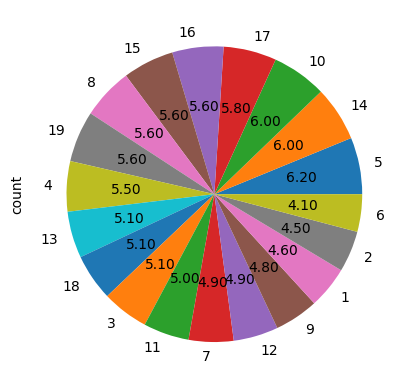

In [11]:
df['machine_age_years'].value_counts().plot(kind='pie',autopct="%.2f")

<Axes: xlabel='machine_age_years', ylabel='predicted_maintenance_cost'>

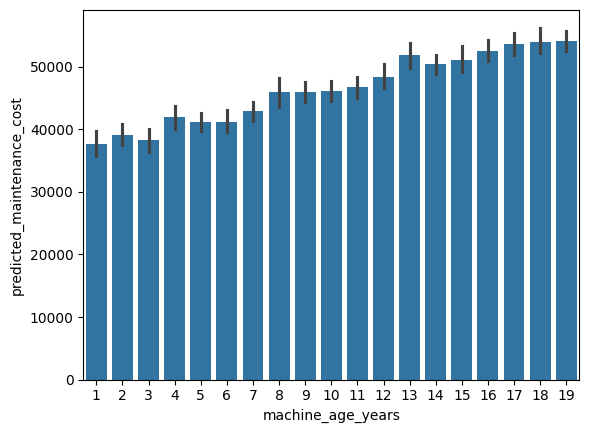

In [12]:
sns.barplot(x=df['machine_age_years'],y=df['predicted_maintenance_cost'])

<Axes: xlabel='downtime_days_last_year', ylabel='machine_age_years'>

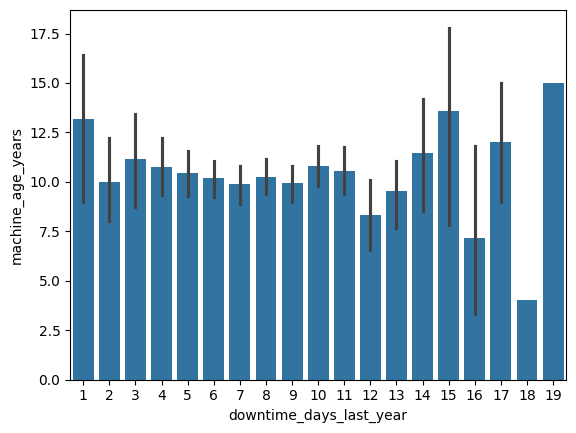

In [13]:
sns.barplot(x=df['downtime_days_last_year'],y=df['machine_age_years'])

<Axes: xlabel='fault_count_last_year', ylabel='machine_age_years'>

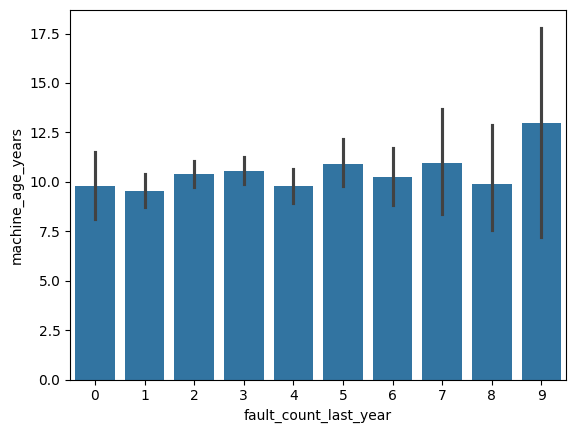

In [14]:
sns.barplot(x=df['fault_count_last_year'],y=df['machine_age_years'])

<Axes: ylabel='count'>

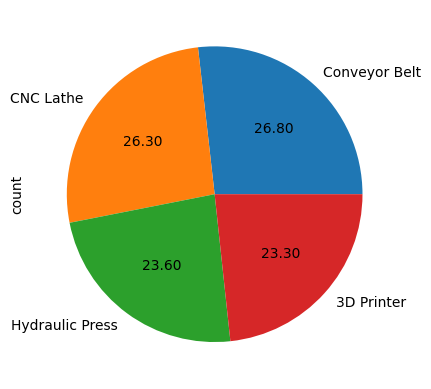

In [15]:
df['machine_type'].value_counts().plot(kind='pie',autopct="%.2f")

/tmp/ipython-input-16-1190629200.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['previous_year_maintenance_cost'])


<Axes: xlabel='previous_year_maintenance_cost', ylabel='Density'>

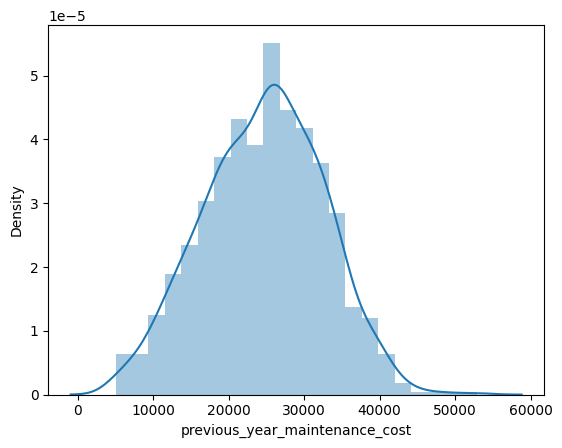

In [16]:
sns.distplot(df['previous_year_maintenance_cost'])

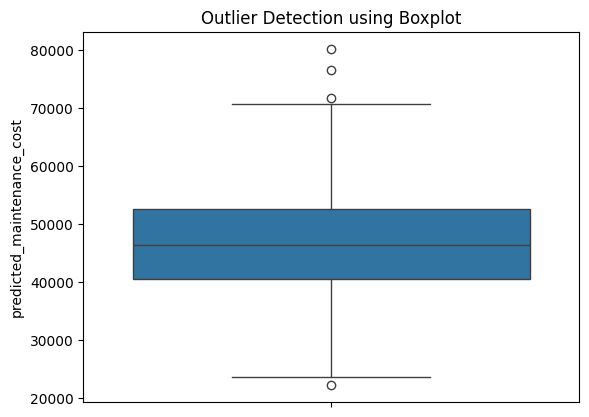

In [17]:
sns.boxplot(data=df, y="predicted_maintenance_cost")
plt.title("Outlier Detection using Boxplot")
plt.show()

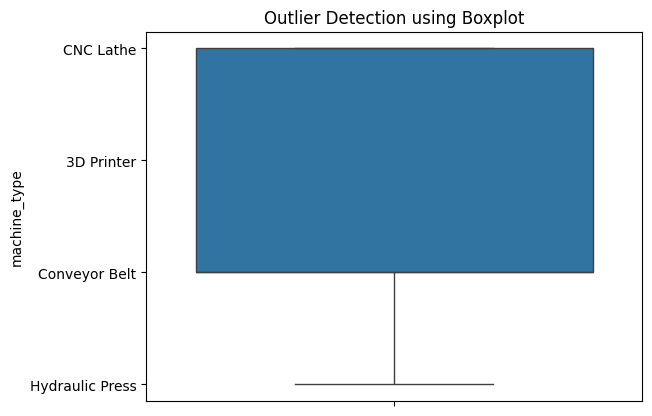

In [18]:
sns.boxplot(data=df, y="machine_type")
plt.title("Outlier Detection using Boxplot")
plt.show()

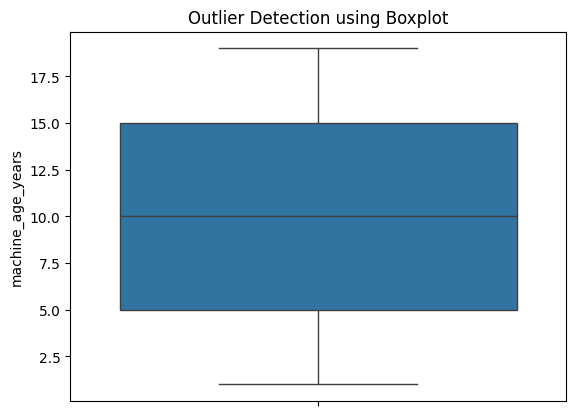

In [19]:
sns.boxplot(data=df, y="machine_age_years")
plt.title("Outlier Detection using Boxplot")
plt.show()

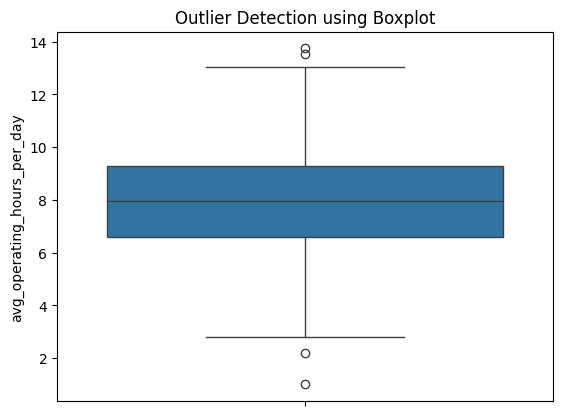

In [20]:
sns.boxplot(data=df, y="avg_operating_hours_per_day")
plt.title("Outlier Detection using Boxplot")
plt.show()

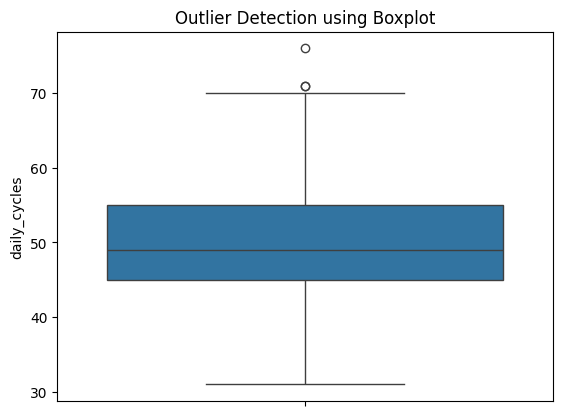

In [21]:
sns.boxplot(data=df, y="daily_cycles")
plt.title("Outlier Detection using Boxplot")
plt.show()

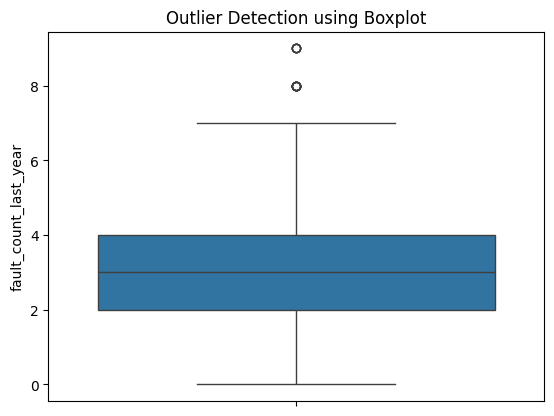

In [22]:
sns.boxplot(data=df, y="fault_count_last_year")
plt.title("Outlier Detection using Boxplot")
plt.show()

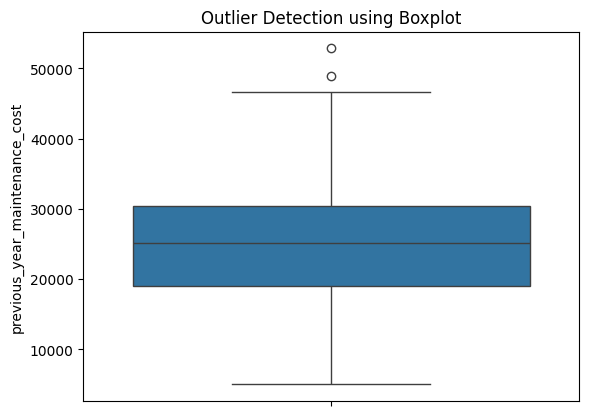

In [23]:
sns.boxplot(data=df, y="previous_year_maintenance_cost")
plt.title("Outlier Detection using Boxplot")
plt.show()

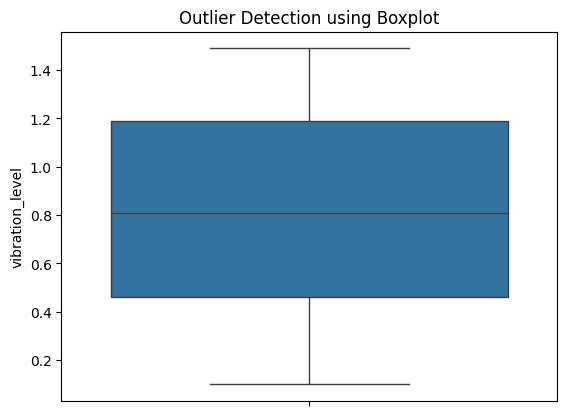

In [24]:
sns.boxplot(data=df, y="vibration_level")
plt.title("Outlier Detection using Boxplot")
plt.show()

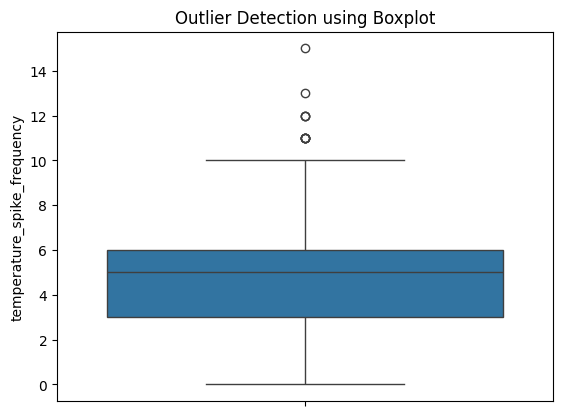

In [25]:
sns.boxplot(data=df, y="temperature_spike_frequency")
plt.title("Outlier Detection using Boxplot")
plt.show()

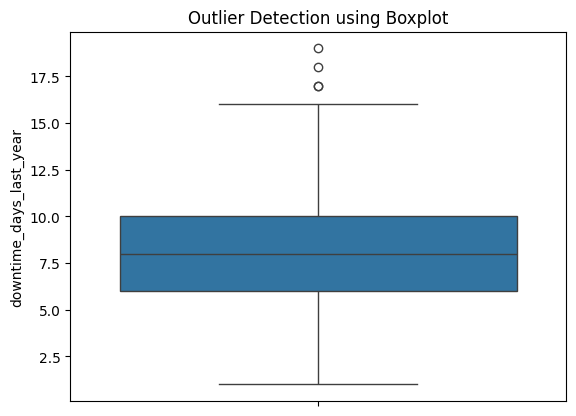

In [26]:
sns.boxplot(data=df, y="downtime_days_last_year")
plt.title("Outlier Detection using Boxplot")
plt.show()

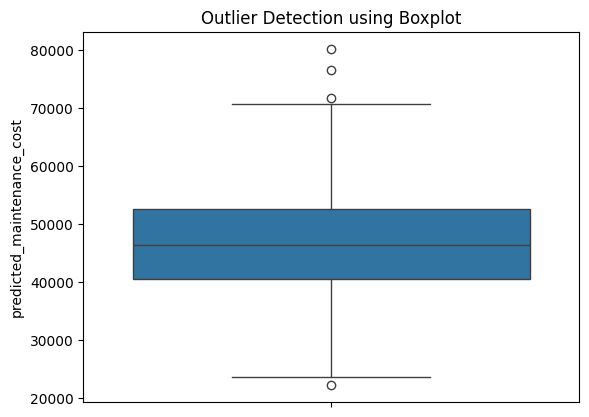

In [27]:
sns.boxplot(data=df, y="predicted_maintenance_cost")
plt.title("Outlier Detection using Boxplot")
plt.show()

**Train_test_split**

In [28]:
df_encoded=pd.get_dummies(df,columns=['machine_type'],drop_first=True) #it will convert text data into numerical and also remove drop first column

In [29]:
df_encoded

,machine_age_years,avg_operating_hours_per_day,daily_cycles,fault_count_last_year,previous_year_maintenance_cost,vibration_level,temperature_spike_frequency,downtime_days_last_year,predicted_maintenance_cost,machine_type_CNC Lathe,machine_type_Conveyor Belt,machine_type_Hydraulic Press
0,11,9.46,53,3,15485.29,0.93,4,8,45487.09,True,False,False
1,17,8.95,48,5,24203.84,1.02,7,9,64267.77,False,False,False
2,18,8.25,54,6,29981.58,0.81,1,7,51816.66,True,False,False
3,14,6.73,45,1,20674.85,1.24,8,5,47885.85,False,True,False
4,13,10.68,48,4,25106.37,0.45,4,10,56130.28,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,19,12.22,59,2,17781.14,0.70,6,5,49798.58,False,False,True
996,3,9.30,45,1,20035.71,0.45,5,7,28099.64,False,False,True
997,19,6.98,38,2,26668.50,1.38,5,8,60262.44,True,False,False
998,12,7.48,38,3,39042.31,0.32,6,9,52023.53,False,False,True


In [30]:
df.columns

Index(['machine_type', 'machine_age_years', 'avg_operating_hours_per_day',
       'daily_cycles', 'fault_count_last_year',
       'previous_year_maintenance_cost', 'vibration_level',
       'temperature_spike_frequency', 'downtime_days_last_year',
       'predicted_maintenance_cost'],
      dtype='object')

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,classification_report

In [32]:
X_train,X_test,y_train,y_test=train_test_split(df_encoded.drop(columns=['predicted_maintenance_cost']),df_encoded['predicted_maintenance_cost'],test_size=0.3,random_state=42)

In [33]:
X_train.head()

,machine_age_years,avg_operating_hours_per_day,daily_cycles,fault_count_last_year,previous_year_maintenance_cost,vibration_level,temperature_spike_frequency,downtime_days_last_year,machine_type_CNC Lathe,machine_type_Conveyor Belt,machine_type_Hydraulic Press
541,18,8.95,57,3,20598.22,0.97,4,6,False,False,False
440,7,7.26,42,2,38722.74,1.27,6,9,True,False,False
482,19,9.86,69,5,25099.92,1.41,2,7,False,False,True
422,16,6.97,62,3,28360.91,1.44,5,4,False,False,False
778,6,8.25,52,2,35457.76,0.60,6,6,True,False,False


In [34]:
X_test.head()

,machine_age_years,avg_operating_hours_per_day,daily_cycles,fault_count_last_year,previous_year_maintenance_cost,vibration_level,temperature_spike_frequency,downtime_days_last_year,machine_type_CNC Lathe,machine_type_Conveyor Belt,machine_type_Hydraulic Press
521,6,9.11,41,5,19330.65,0.46,3,2,False,True,False
737,9,7.94,48,3,18971.60,0.53,7,11,False,False,False
740,16,8.43,56,3,9613.08,1.46,5,4,True,False,False
660,14,3.89,55,3,26066.60,0.90,5,9,True,False,False
411,10,8.89,66,6,21526.23,0.20,5,7,False,False,False


In [35]:
X_train.shape , X_test.shape

((700, 11), (300, 11))

**Feature Transformation**

In [36]:
#model
trf1=LinearRegression()
# trf2=RandomForestRegressor(n_estimators=100, random_state=42)
# trf3=DecisionTreeRegressor(random_state=42)
# trf4=XGBRegressor(n_estimators=100, random_state=42)
# trf5=LGBMRegressor(n_estimators=100, random_state=42)

In [37]:
trf1.fit(X_train,y_train)
# trf2.fit(X_train,y_train)
# trf3.fit(X_train,y_train)
# trf4.fit(X_train,y_train)
# trf5.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred=trf1.predict(X_test)
# y_pred2=trf2.predict(X_test)
# y_pred3=trf3.predict(X_test)
# y_pred4=trf4.predict(X_test)
# y_pred5=trf5.predict(X_test)

In [39]:
print(f"Linear Regression")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

Linear Regression
Mean Absolute Error: 2365.681580054523
Mean Squared Error: 8353724.67445975
R-squared: 0.8785439526943651


In [40]:
# print(f"Random Forest Regressor")
# print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred2)}")
# print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred2)}")
# print(f"R-squared: {r2_score(y_test, y_pred2)}")

In [41]:
# print(f"DECISION TREE REGRESSOR ")
# print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred3)}")
# print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred3)}")
# print(f"R-squared: {r2_score(y_test, y_pred3)}")

In [42]:
# print(f"XGBRegressor")
# print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred4)}")
# print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred4)}")
# print(f"R-squared: {r2_score(y_test, y_pred4)}")

In [43]:
# print(f"LGBMRegressor")
# print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred5)}")
# print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred5)}")
# print(f"R-squared: {r2_score(y_test, y_pred5)}")

In [44]:
#By applying the multiple algorithm we come to the conclusion that we have to use LinearRegression algorithm because score of R-squared is much better than other.

**Deploy**

In [45]:
import joblib

In [46]:
joblib.dump(trf1,"model.pkl")

['model.pkl']

In [47]:
# Download files (Colab-specific)
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>